In [1]:
import pandas as pd

In [2]:
from pandas_profiling import ProfileReport

In [3]:
from sklearn import preprocessing

In [4]:
df = pd.read_csv("flight_delays_data.csv", parse_dates=[8])

In [5]:
le = preprocessing.LabelEncoder()
df["Arrival_enc"] = le.fit_transform(df[["Arrival"]])
df["Airline_enc"] = le.fit_transform(df[["Airline"]])

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [6]:
df["flight_year"] = df["flight_date"].apply(lambda x: x.year)
df["flight_month"] = df["flight_date"].apply(lambda x: x.month)
df["flight_day"] = df["flight_date"].apply(lambda x: x.day)

df["delay_time"] = df["delay_time"].apply(lambda x: 9999 if x == "Cancelled" else float(x))

df["label"] = df["is_claim"].apply(lambda x: True if x != 0 else False)

In [7]:
df.head()

,flight_id,flight_no,Week,Departure,Arrival,Airline,std_hour,delay_time,flight_date,is_claim,Arrival_enc,Airline_enc,flight_year,flight_month,flight_day,label
0,1582499,UO686,27,HKG,KIX,UO,10,0.4,2016-07-01,0,73,110,2016,7,1,False
1,1582501,CI7868,17,HKG,TNN,CI,11,0.5,2015-04-23,0,140,26,2015,4,23,False
2,1582504,PR301,14,HKG,MNL,PR,11,0.0,2014-04-08,0,94,85,2014,4,8,False
3,1582508,LD327,37,HKG,SIN,LD,3,0.1,2013-09-15,0,128,59,2013,9,15,False
4,1582509,KA5390,40,HKG,PEK,KA,9,0.5,2015-10-05,0,111,53,2015,10,5,False


In [ ]:
df.info()

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Cancel Flights EDA

<AxesSubplot:title={'center':'canceled flight counts by date'}, xlabel='flight_date'>

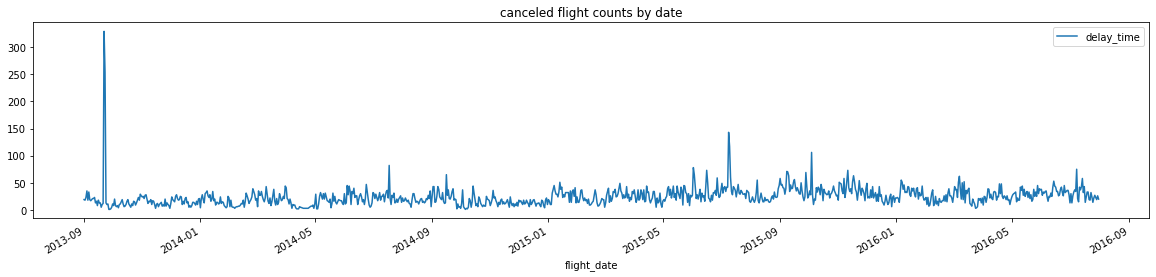

In [26]:
cancel_flights = df[df.delay_time == 9999]
cancel_flights[['flight_date','delay_time']].groupby(['flight_date']).count().plot(title="canceled flight counts by date", figsize=(20,4))

<AxesSubplot:title={'center':'canceled flight counts by year month'}, xlabel='flight_year,flight_month'>

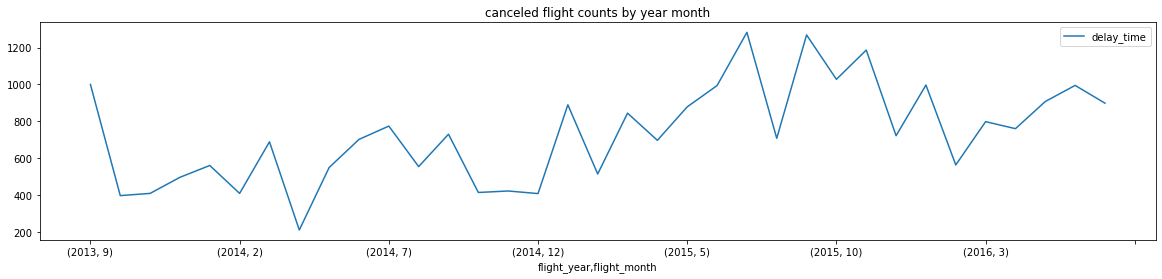

In [27]:
cancel_flights = df[df.delay_time == 9999]
cancel_flights[['flight_year', 'flight_month','delay_time']].groupby(['flight_year', 'flight_month']).count().plot(title="canceled flight counts by year month", figsize=(20,4))

<AxesSubplot:title={'center':'canceled flight counts by airline'}, xlabel='Airline'>

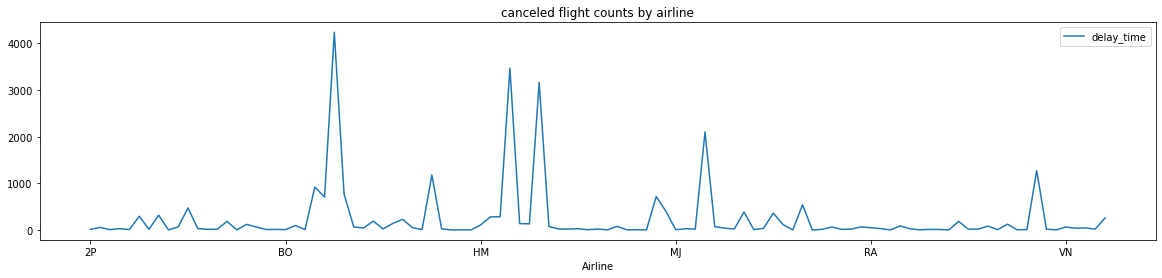

In [28]:
cancel_flights = df[df.delay_time == 9999]
cancel_flights[['Airline','delay_time']].groupby(['Airline']).count().plot(title="canceled flight counts by airline", figsize=(20,4))

<AxesSubplot:title={'center':'canceled flight counts by arrival'}, xlabel='Arrival'>

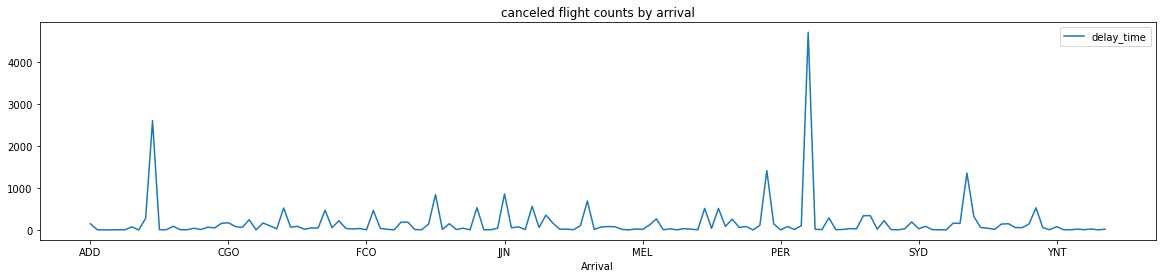

In [29]:
cancel_flights = df[df.delay_time == 9999]
cancel_flights[['Arrival','delay_time']].groupby(['Arrival']).count().plot(title="canceled flight counts by arrival", figsize=(20,4))

In [ ]:
label = df.pop("label")
df.pop("flight_id")
df.pop("flight_no")
df.pop("Departure")
df.pop("Arrival")
df.pop("Airline")
df.pop("is_claim")
df.pop("flight_date")
data = df

In [ ]:
corr = df.corr()

In [ ]:
corr.style.background_gradient()

In [ ]:
from tpot import TPOTClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
xgb = XGBClassifier(n_estimators=100,
                    max_depth=6,
                    learning_rate=0.5,
                    n_jobs=6,
                    verbosity=0)
len_features = len(data.columns)
#pylint:disable=invalid-name
X_train, _, y_train, _ = train_test_split(data,
                                          label.values,
                                          train_size=0.75,
                                          test_size=0.25,
                                          random_state=39)


In [ ]:
sfs = SFS(xgb,
          k_features=(1, len_features),
          forward=True,
          floating=True,
          verbose=1,
          scoring='neg_mean_absolute_error',
          cv=5,
          n_jobs=6)
sfs = sfs.fit(X_train, y_train)

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

In [ ]:
%matplotlib inline